In [2]:
!pip install everywhereml==0.2.21

IMPORT DATA

In [3]:
from everywhereml.data import ImageDataset

base_folder = 'datatraffic'

image_dataset = ImageDataset.from_nested_folders(
    name='Sign',
    base_folder=base_folder
)

print(image_dataset)

ImageDataset[Sign](num_images=13019, num_labels=11, labels=['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'])


CHECK 

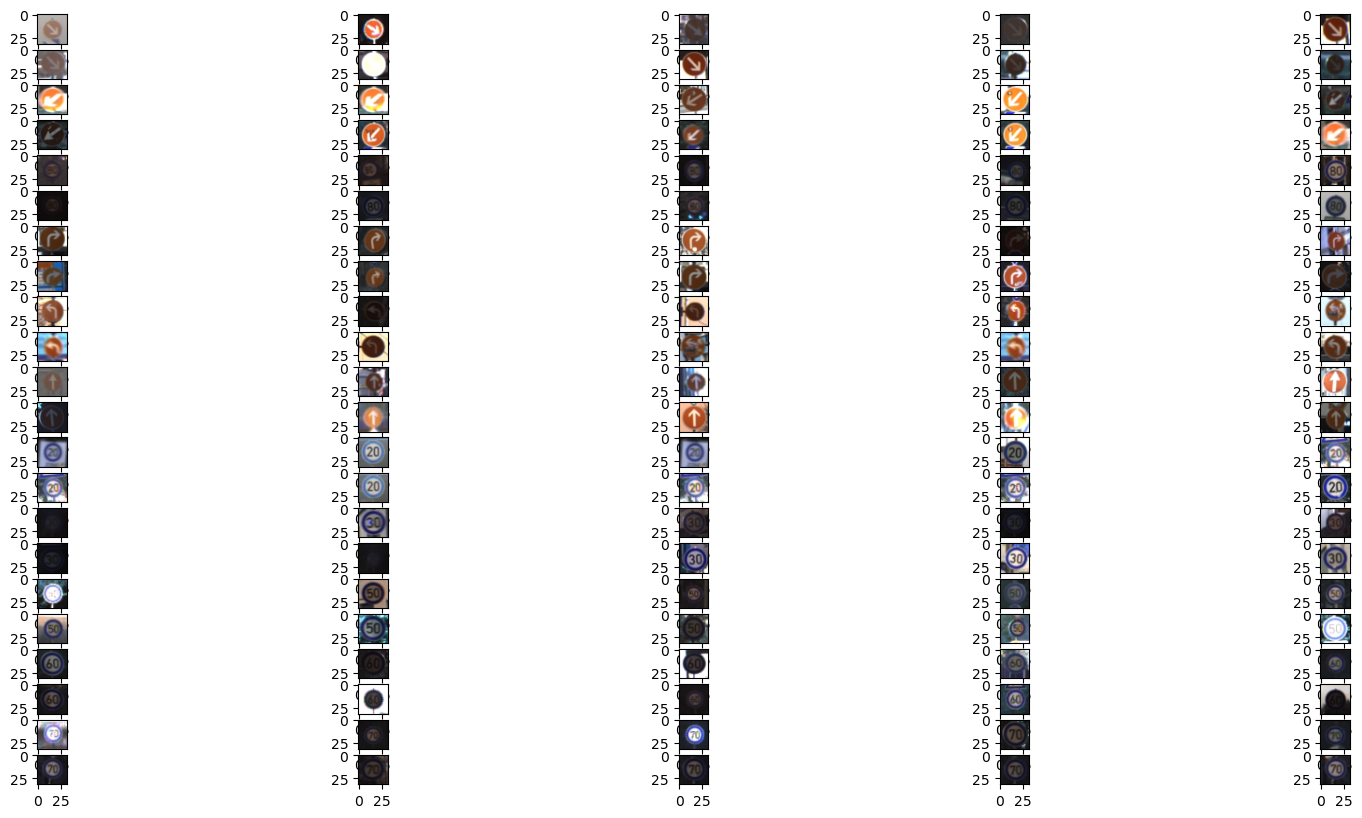

In [4]:
image_dataset.preview(
    samples_per_class=10, 
    rows_per_class=2, 
    figsize=(20, 10)
)

CONVERT GRAY IMAGE

In [5]:
image_dataset = image_dataset.gray().uint8()

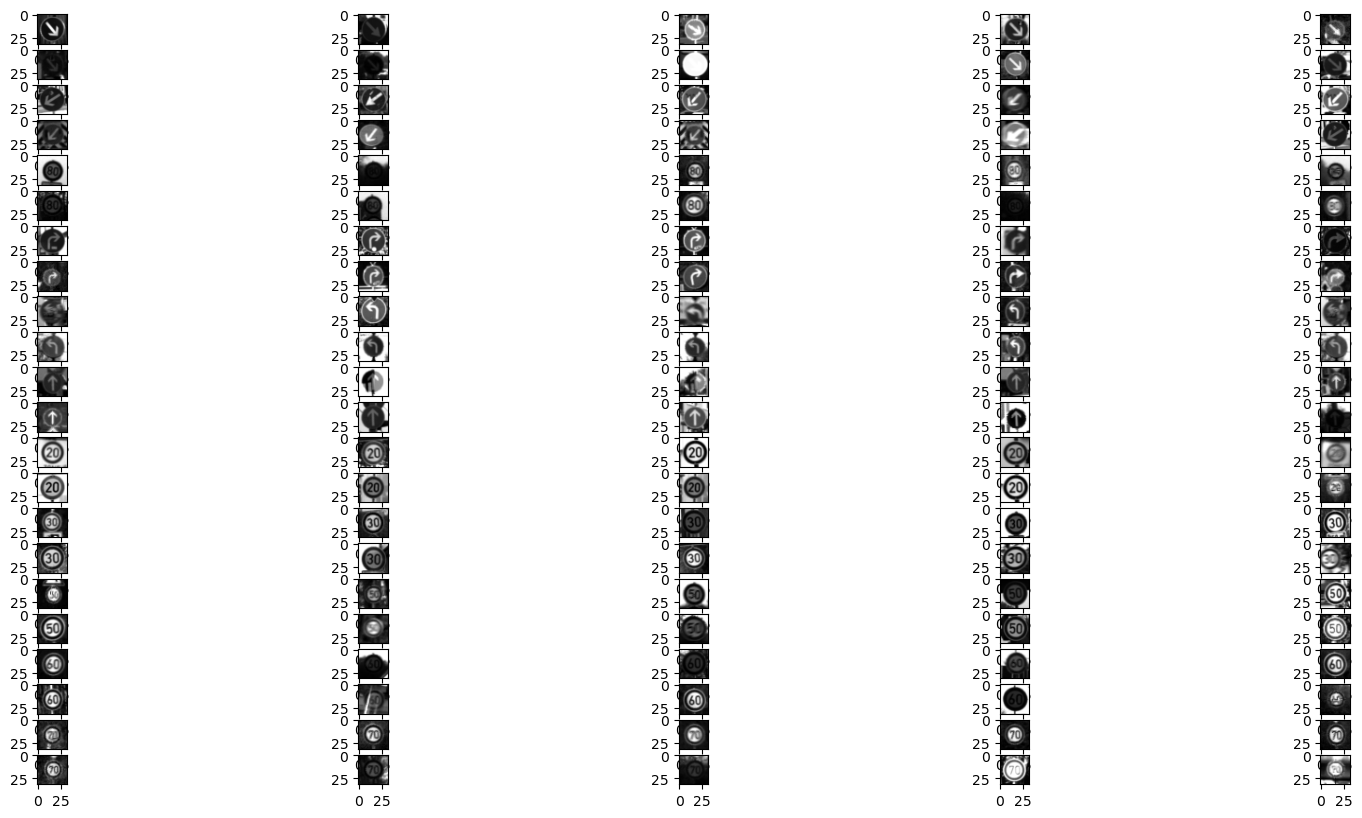

In [6]:
image_dataset.preview(
    samples_per_class=10, 
    rows_per_class=2, 
    figsize=(20, 10), 
    cmap='gray'
)

Create an image recognition pipeline with HOG feature extractor

In [8]:
from everywhereml.preprocessing.image.object_detection import HogPipeline
from everywhereml.preprocessing.image.transform import Resize

pipeline = HogPipeline(
    transforms=[
        Resize(width=40, height=30)
    ]
)

# Convert images to feature vectors
feature_dataset = pipeline.fit_transform(image_dataset)
feature_dataset.describe()
print(pipeline)


HOG: 100%|██████████| 13019/13019 [00:22<00:00, 573.15it/s]


ImagePipeline: HogPipeline
---------
 - Resize(from=(40, 30), to=(40, 30), pixformat=gray)
 > HOG(block_size=8, bins=9, cell_size=3)


Plot pairplot of features.
Feel free to open the image in a new window to see it at full scale.

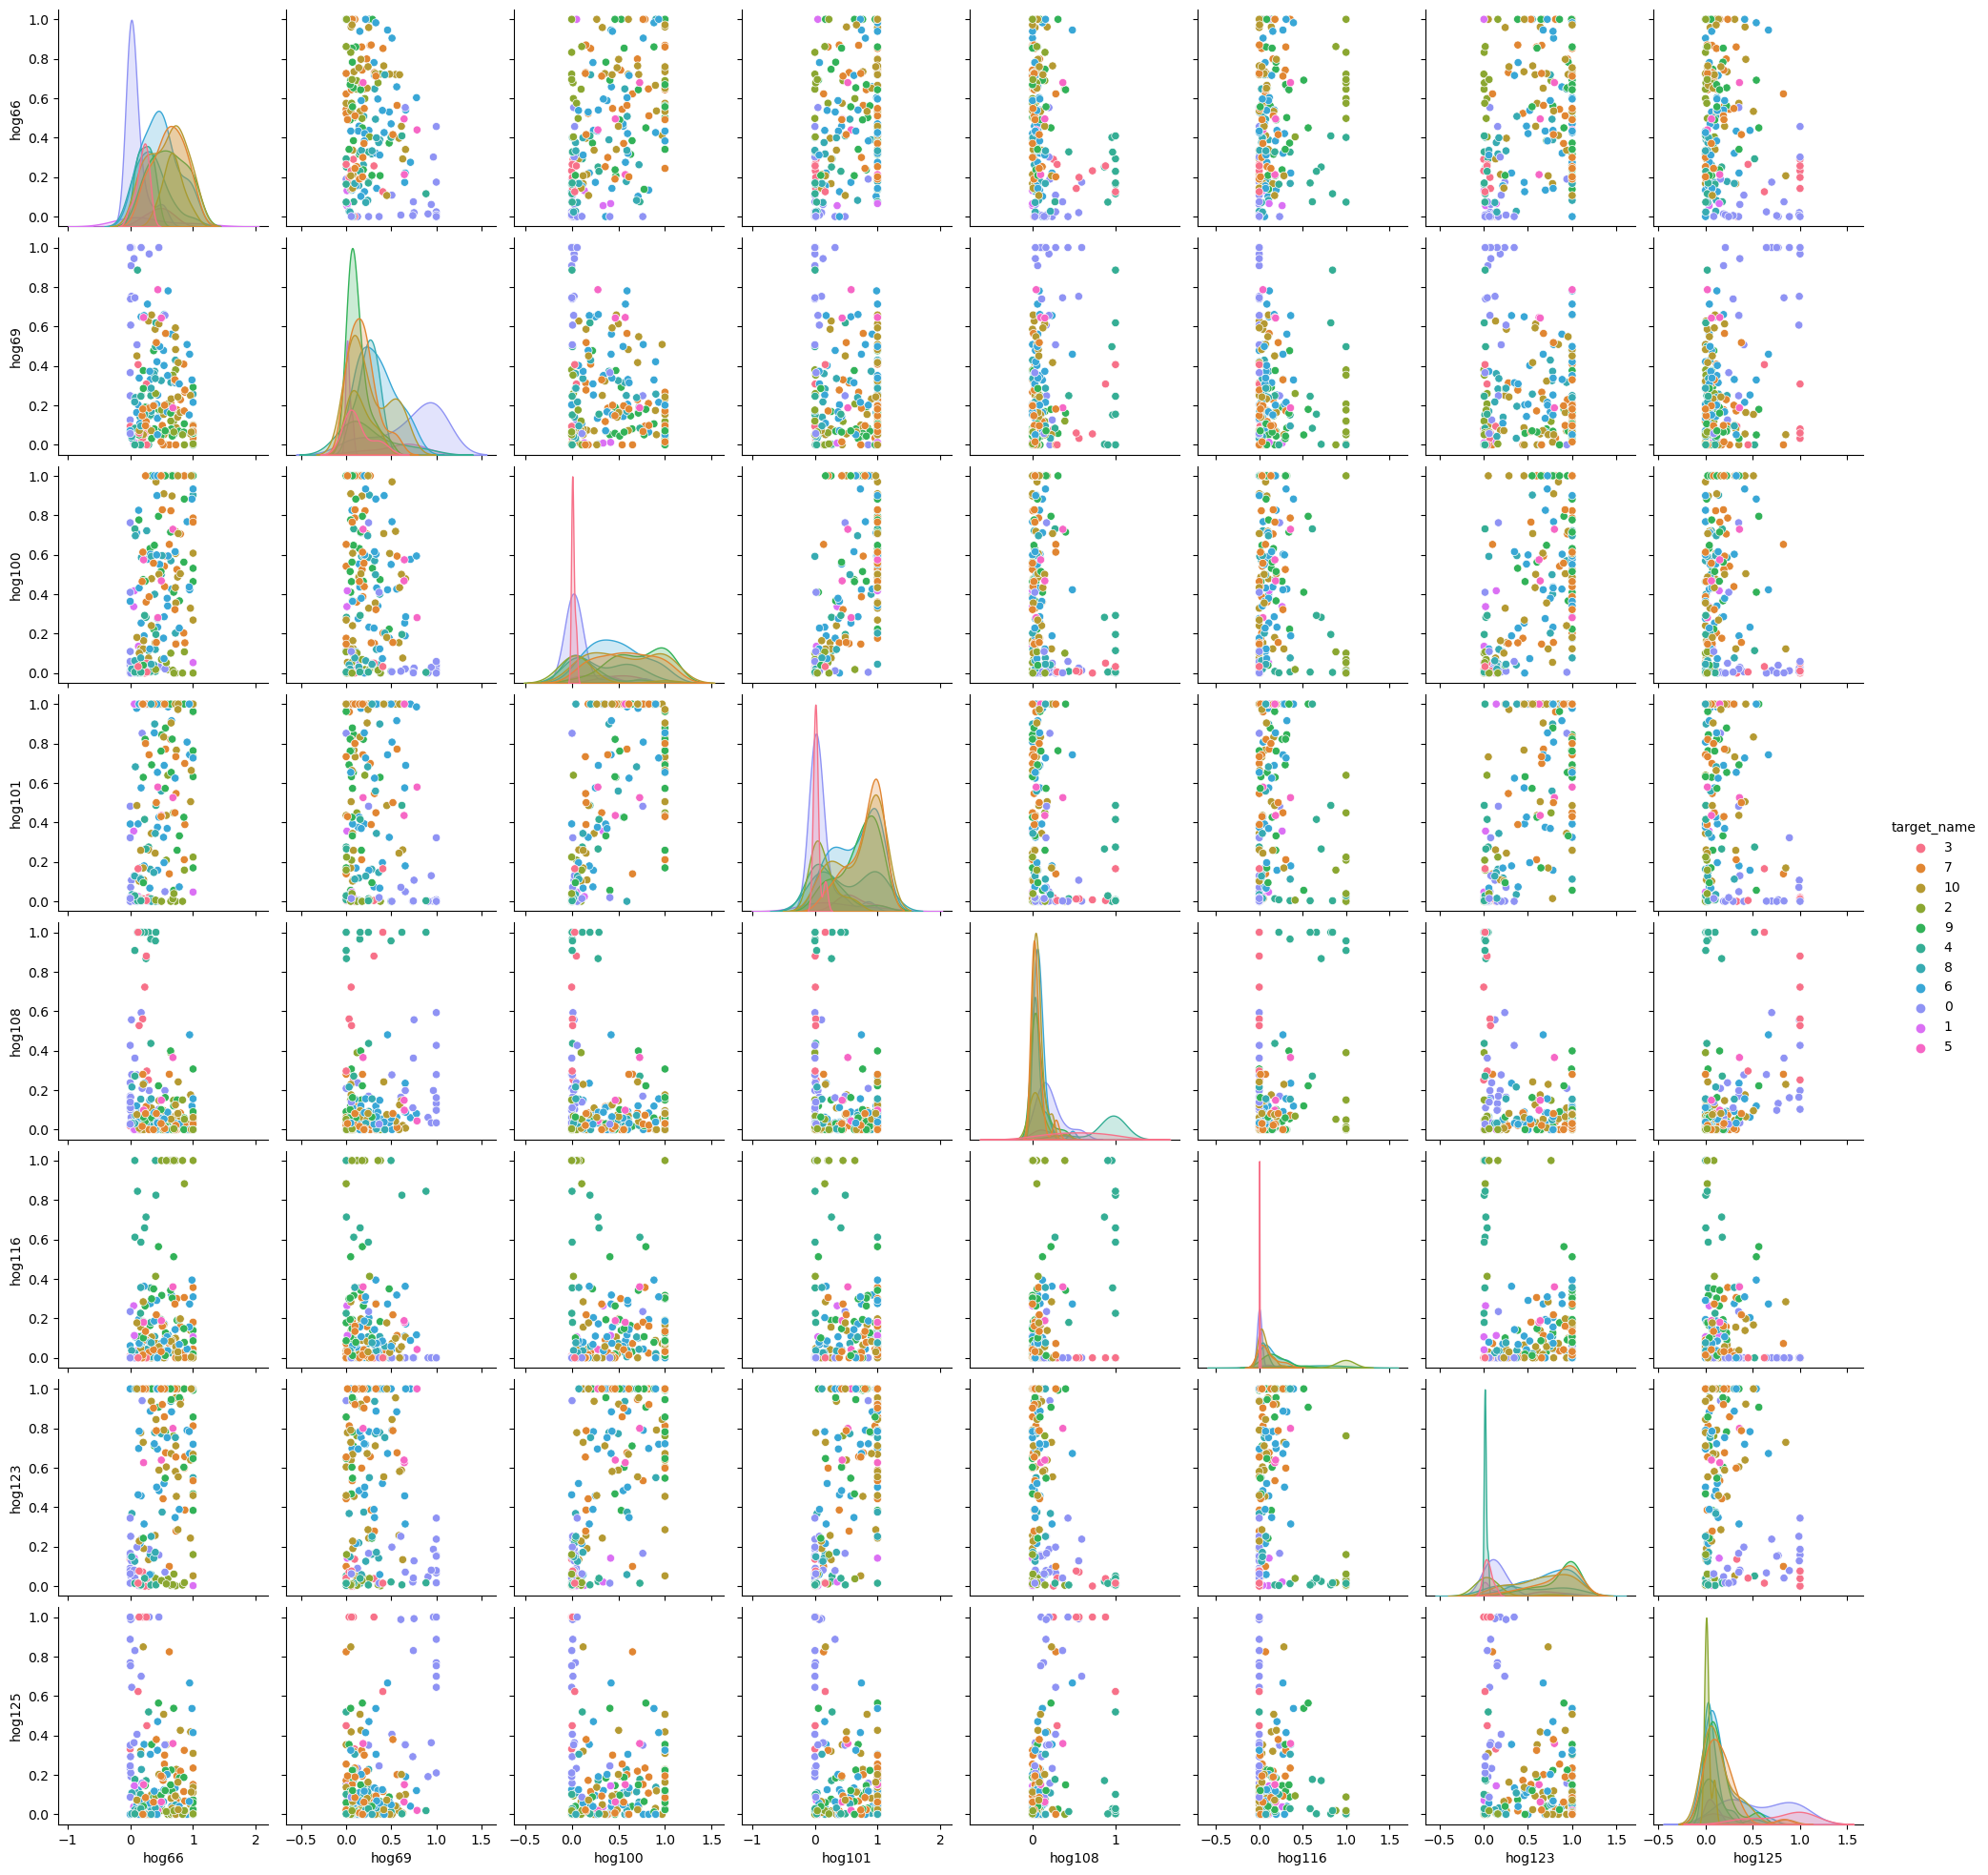

In [9]:
feature_dataset.plot.features_pairplot(n=200, k=8)

UMAP

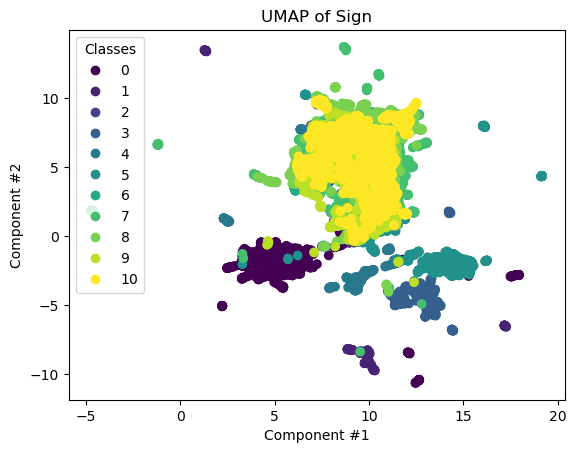

In [10]:
feature_dataset.plot.umap()

Train a Machine Learning classifier

In [11]:
from everywhereml.sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=40)

# fit on train split and get accuracy on the test split
train, test = feature_dataset.split(test_size=0.4)
clf.fit(train)

print('Score on test set: %.2f' % clf.score(test))

# now fit on the whole dataset
clf.fit(feature_dataset)


Score on test set: 0.80


RandomForestClassifier(base_estimator=deprecated, bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), max_depth=40, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, num_outputs=11, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=None, template_folder=everywhereml/sklearn/ensemble, verbose=0, warm_start=False)

CONVERT C++

In [ ]:
print(pipeline.to_arduino_file(
    filename='path-to-sketch/HogPipeline.h',
    instance_name='hog'
))